Import Libraries

In [ ]:
import yaml
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import perform_eda as ed

In [2]:
# pandas_profiling is now called ydata_profiling
# importing PrfileReport
from ydata_profiling import ProfileReport

/home/mnahsan21/miniconda3/envs/mlflow-98454b373dd5cd544df7b8e59ec177a147888d9b/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# getting the config.yaml file so that parameters can be passed directly from Jupyter notebook
with open("/home/mnahsan21/build-ML-model-and-pipeline-for-short-term-rental-prices/config.yaml", "r") as file:
    config = yaml.safe_load(file)

Create Weight and Bias run

In [4]:
run = wandb.init(project=config['main']['project_name'], 
                 group=config['main']['experiment_name'], 
                 job_type="EDA", 
                 save_code=True
                )
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

wandb: Currently logged in as: mnahsan21 (mnahsan). Use `wandb login --relogin` to force relogin


In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


EDA

In [6]:
# 'last_review' column is in string format. Converting it to date format
df['last_review'] = pd.to_datetime(df['last_review'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# checking the column types
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [8]:
# creating a new dataframe to be used for EDA using the perform.eda.py library 
new_df = df.copy()
# drop irrelevant features
new_df.drop(['id', 'host_id', 'host_name', 'name'], axis=1, inplace=True)

In [9]:
new_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Numerical Features

In [10]:
# get numerical features
num_columns = new_df.select_dtypes(include=['number']).columns.tolist()

In [11]:
num_columns

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [12]:
# get a new dataframe for the numerical features
num_df = new_df[num_columns]

In [13]:
num_df.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

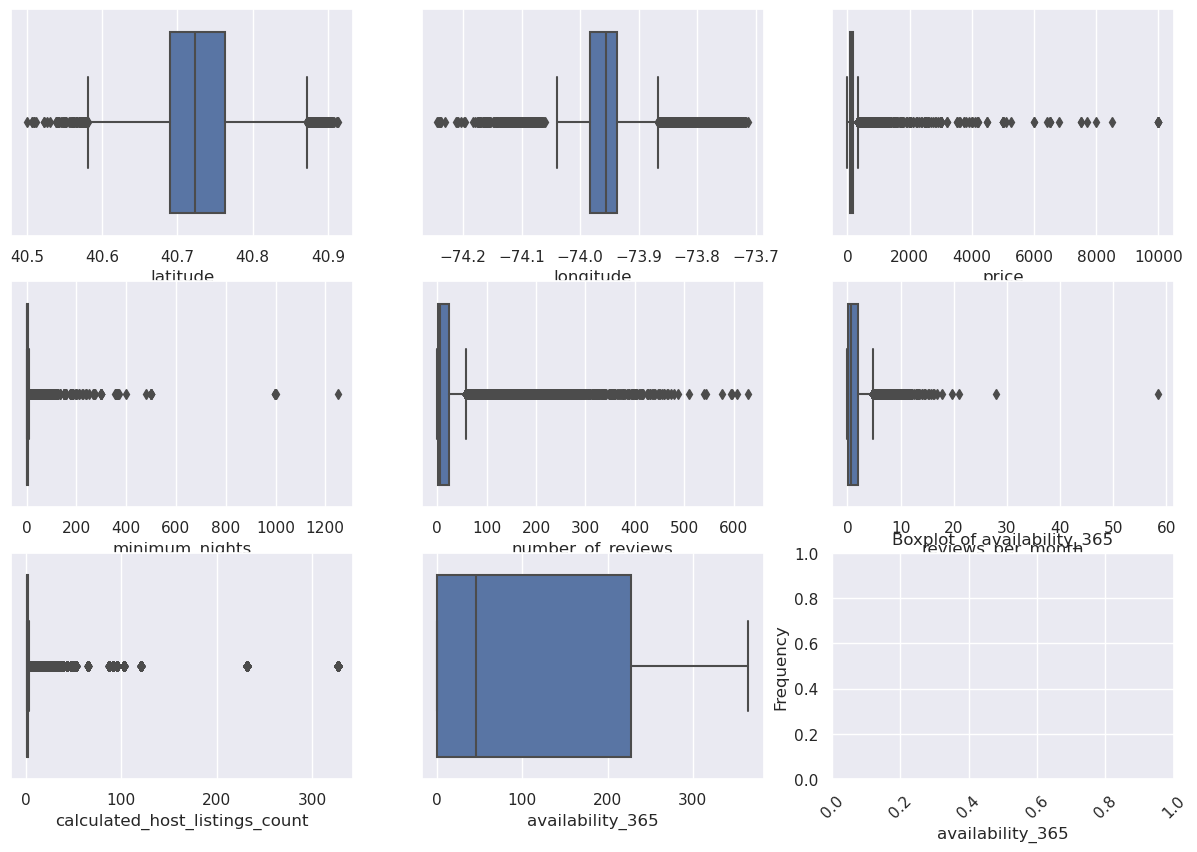

In [14]:
# get boxplots for the numerical features 
ed.plot_boxplot(new_df, num_columns)

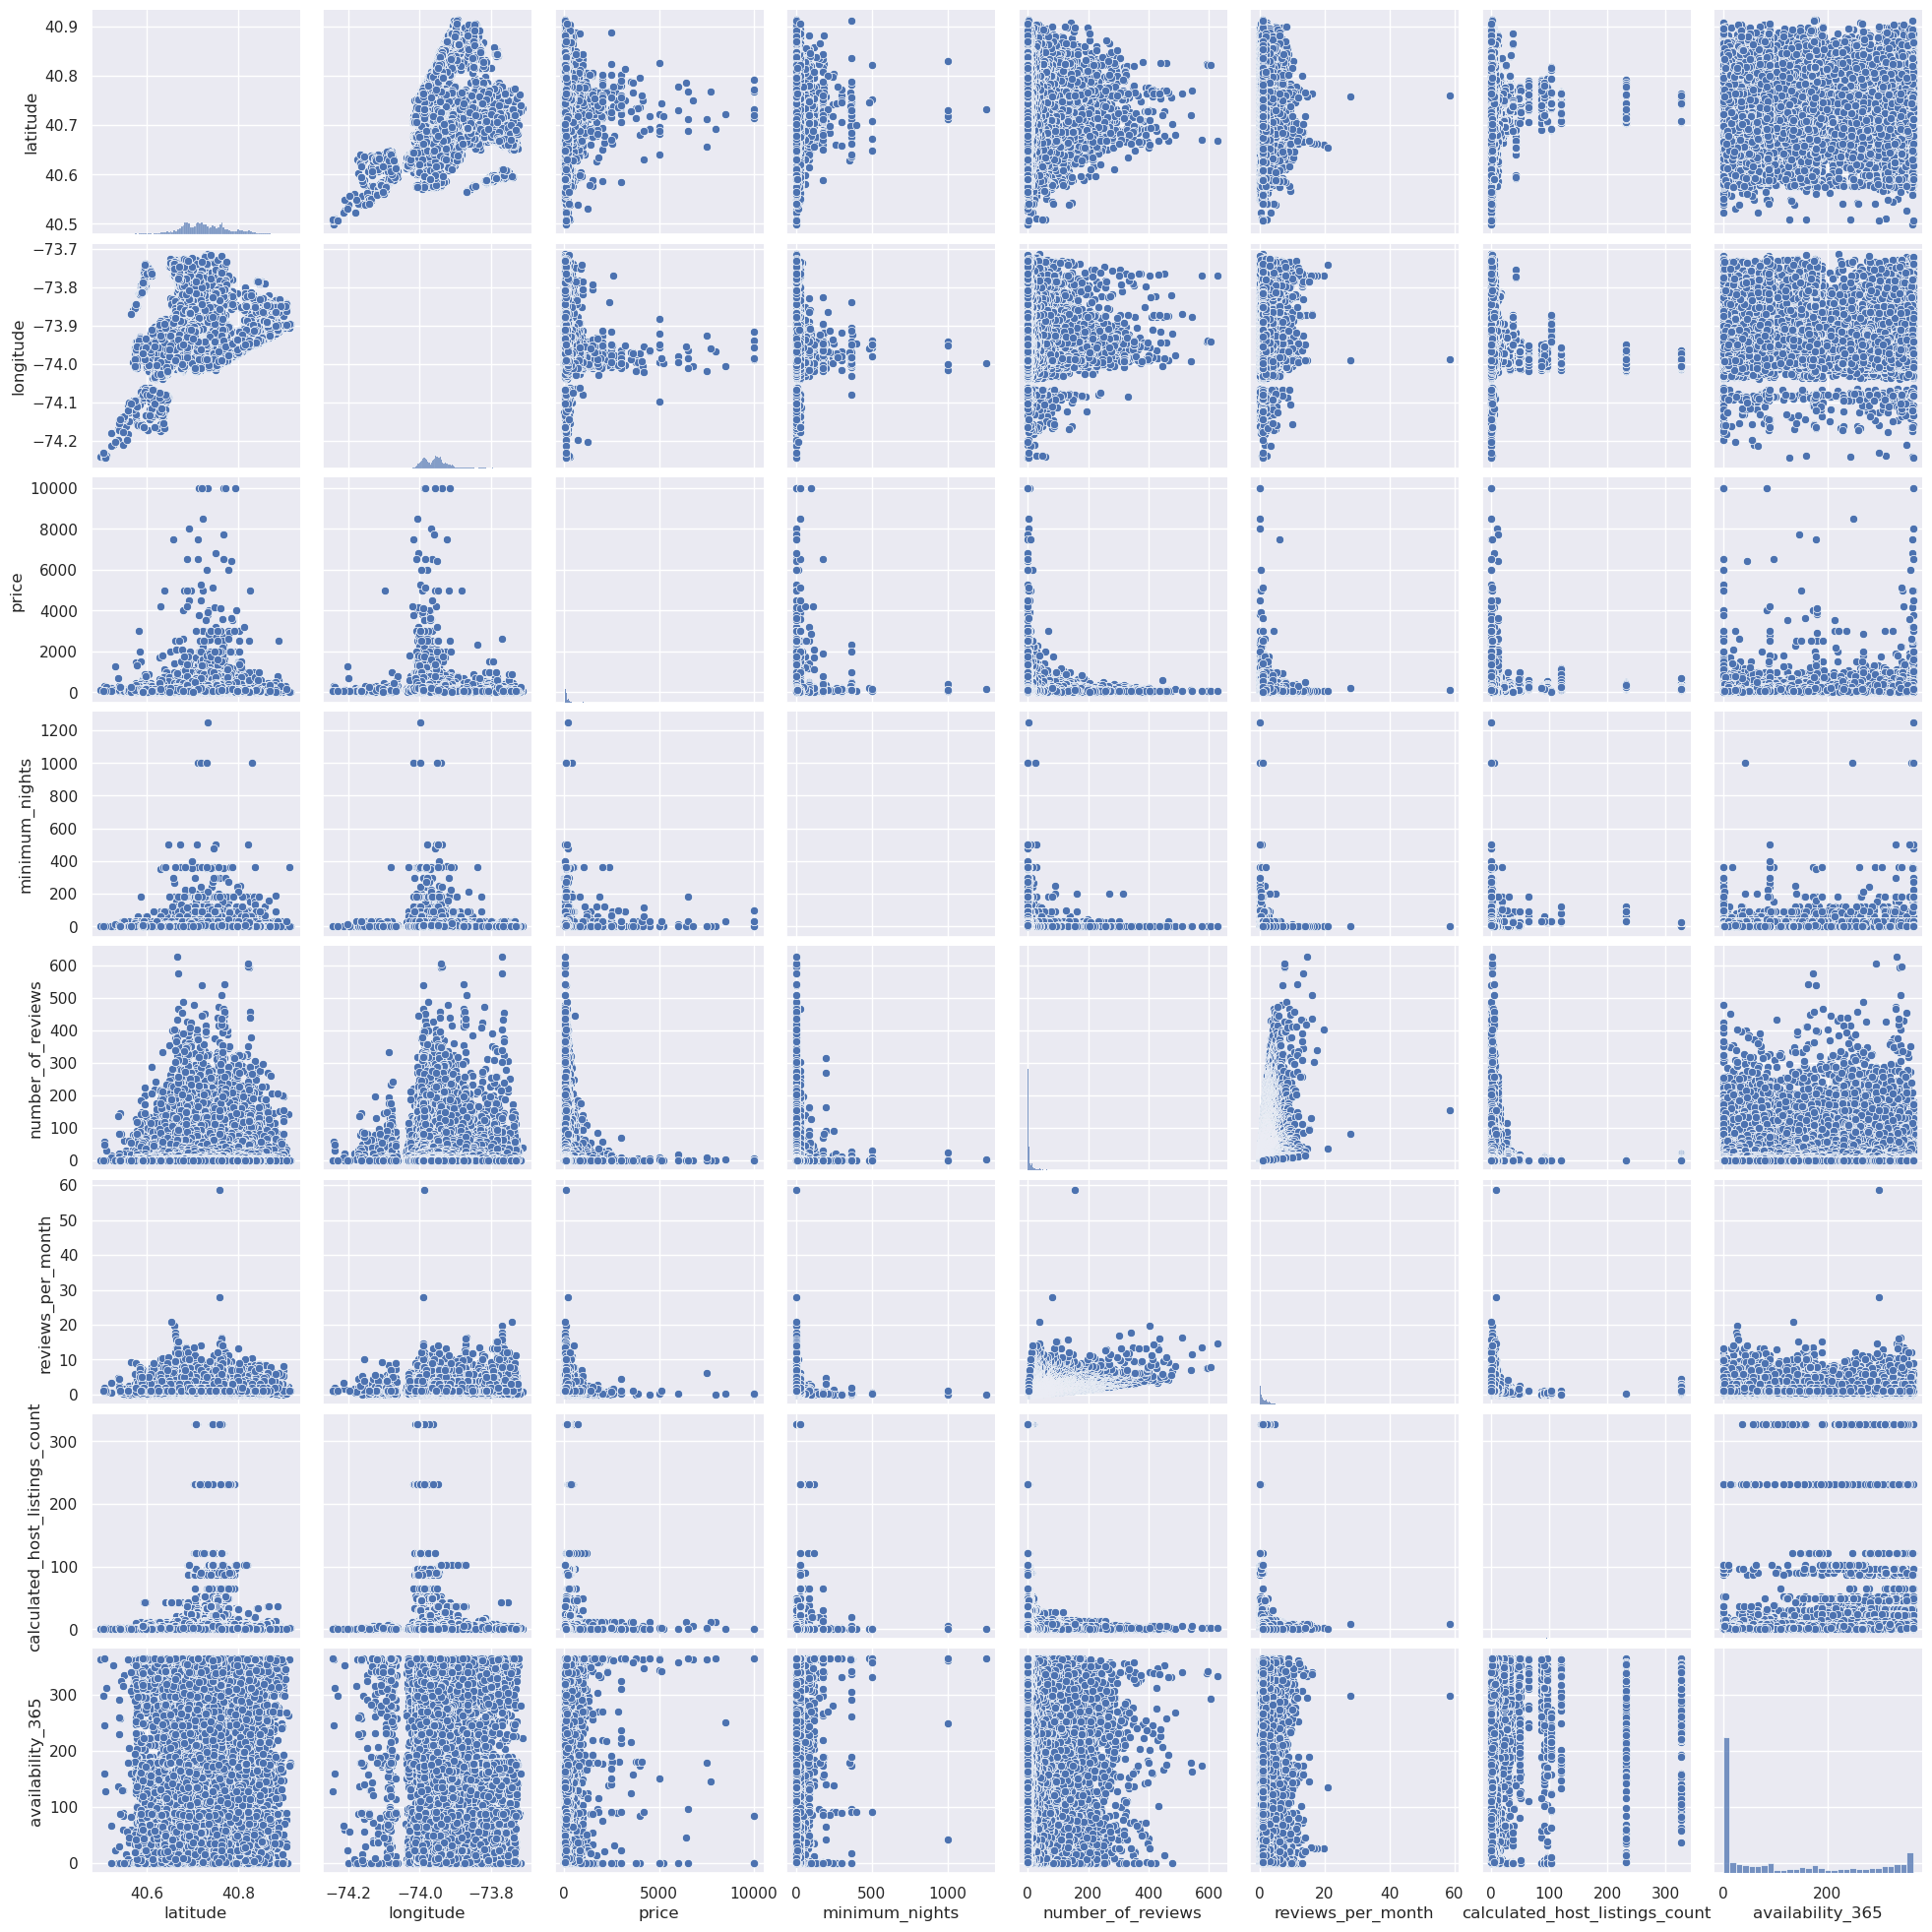

In [15]:
# get pairplots 
sns.pairplot(num_df)

<module 'matplotlib.pyplot' from '/home/mnahsan21/miniconda3/envs/mlflow-98454b373dd5cd544df7b8e59ec177a147888d9b/lib/python3.9/site-packages/matplotlib/pyplot.py'>

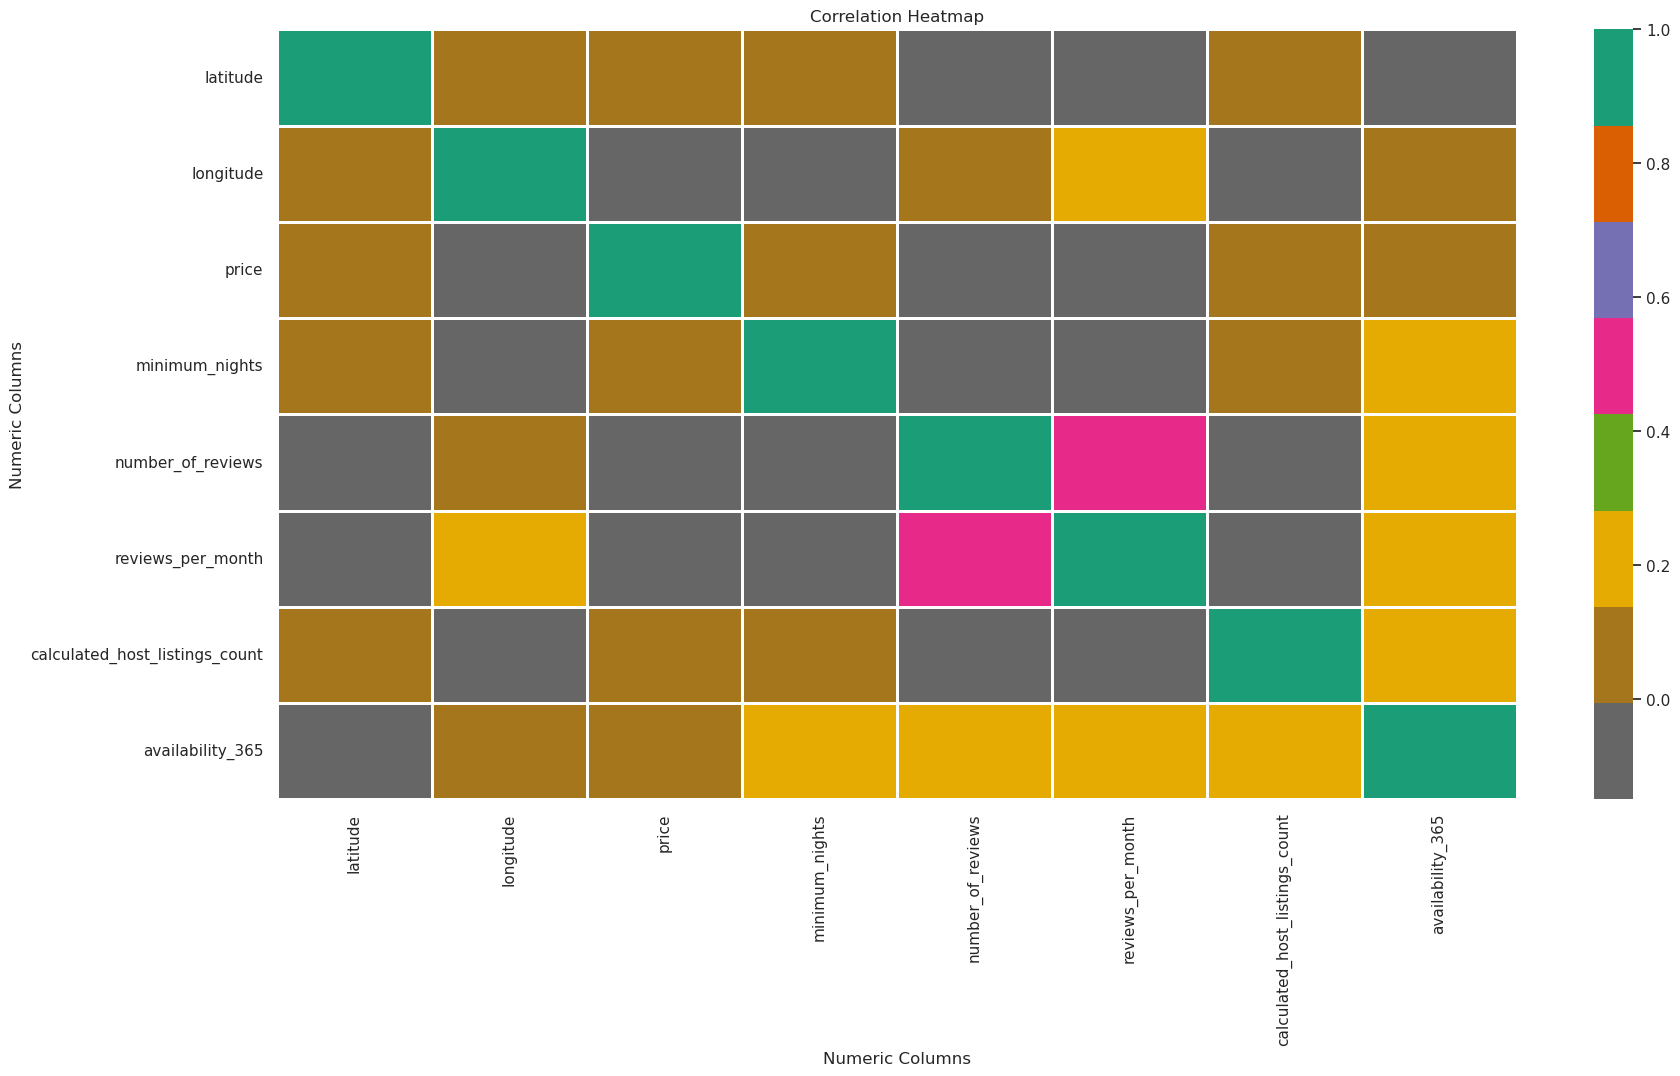

In [16]:
# get correlation heatmap for the numerical features
ed.plot_correlation(new_df)

Categorical Features

In [17]:
# get categorical features 
cat_columns = new_df.select_dtypes(include='object').columns.tolist()

In [18]:
cat_columns

['neighbourhood_group', 'neighbourhood', 'room_type']

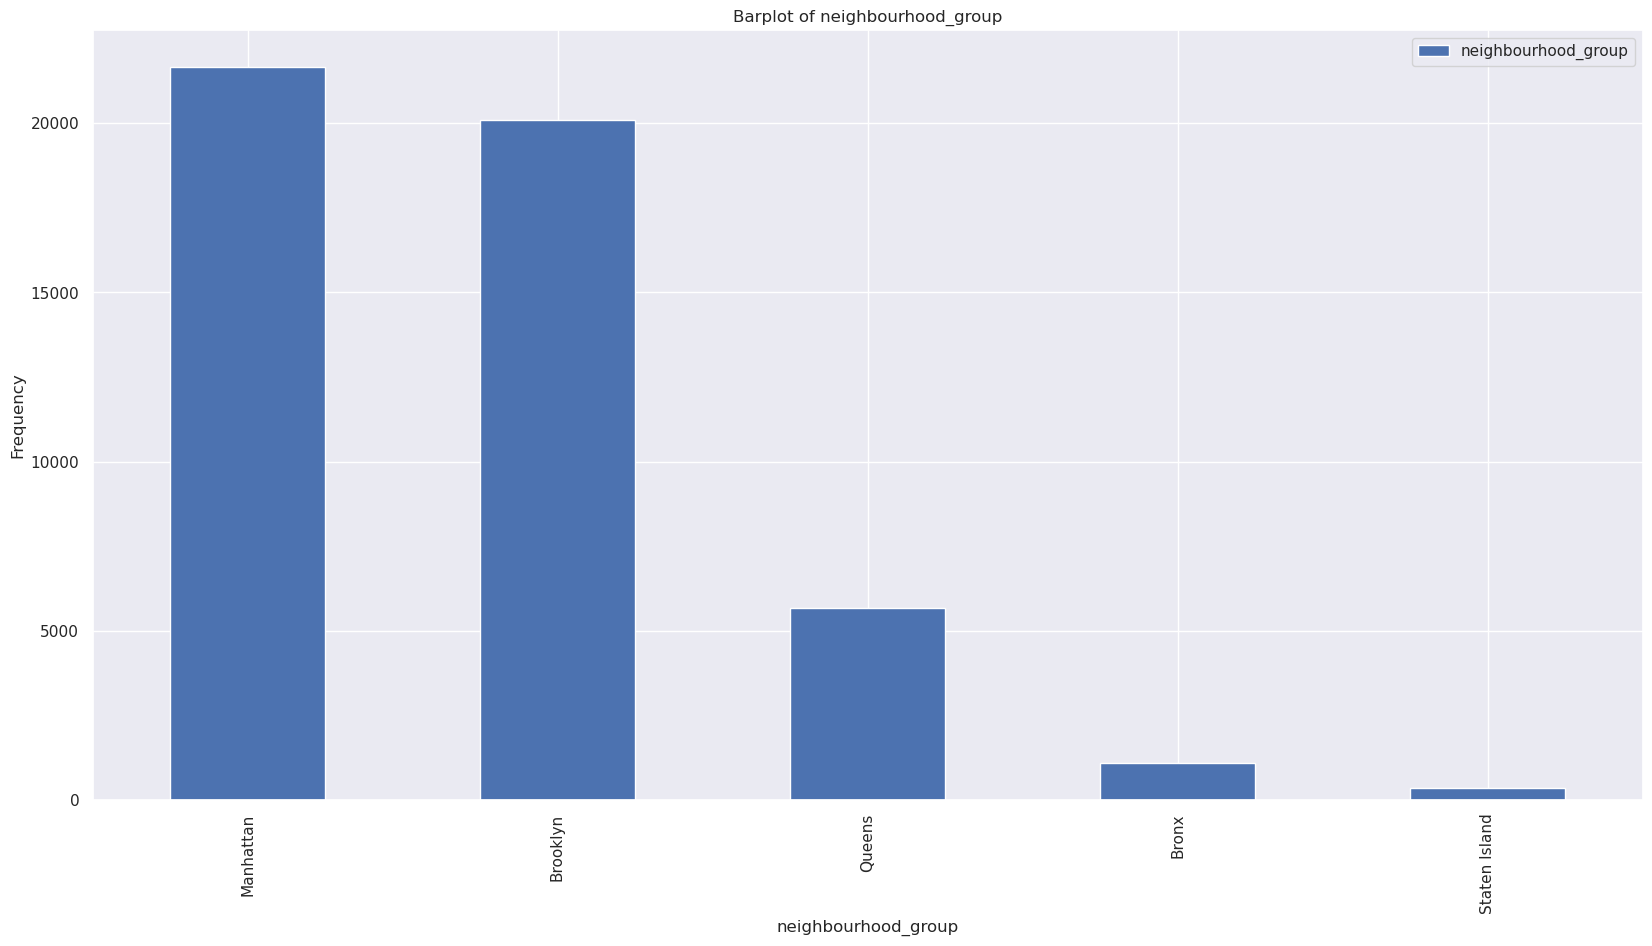

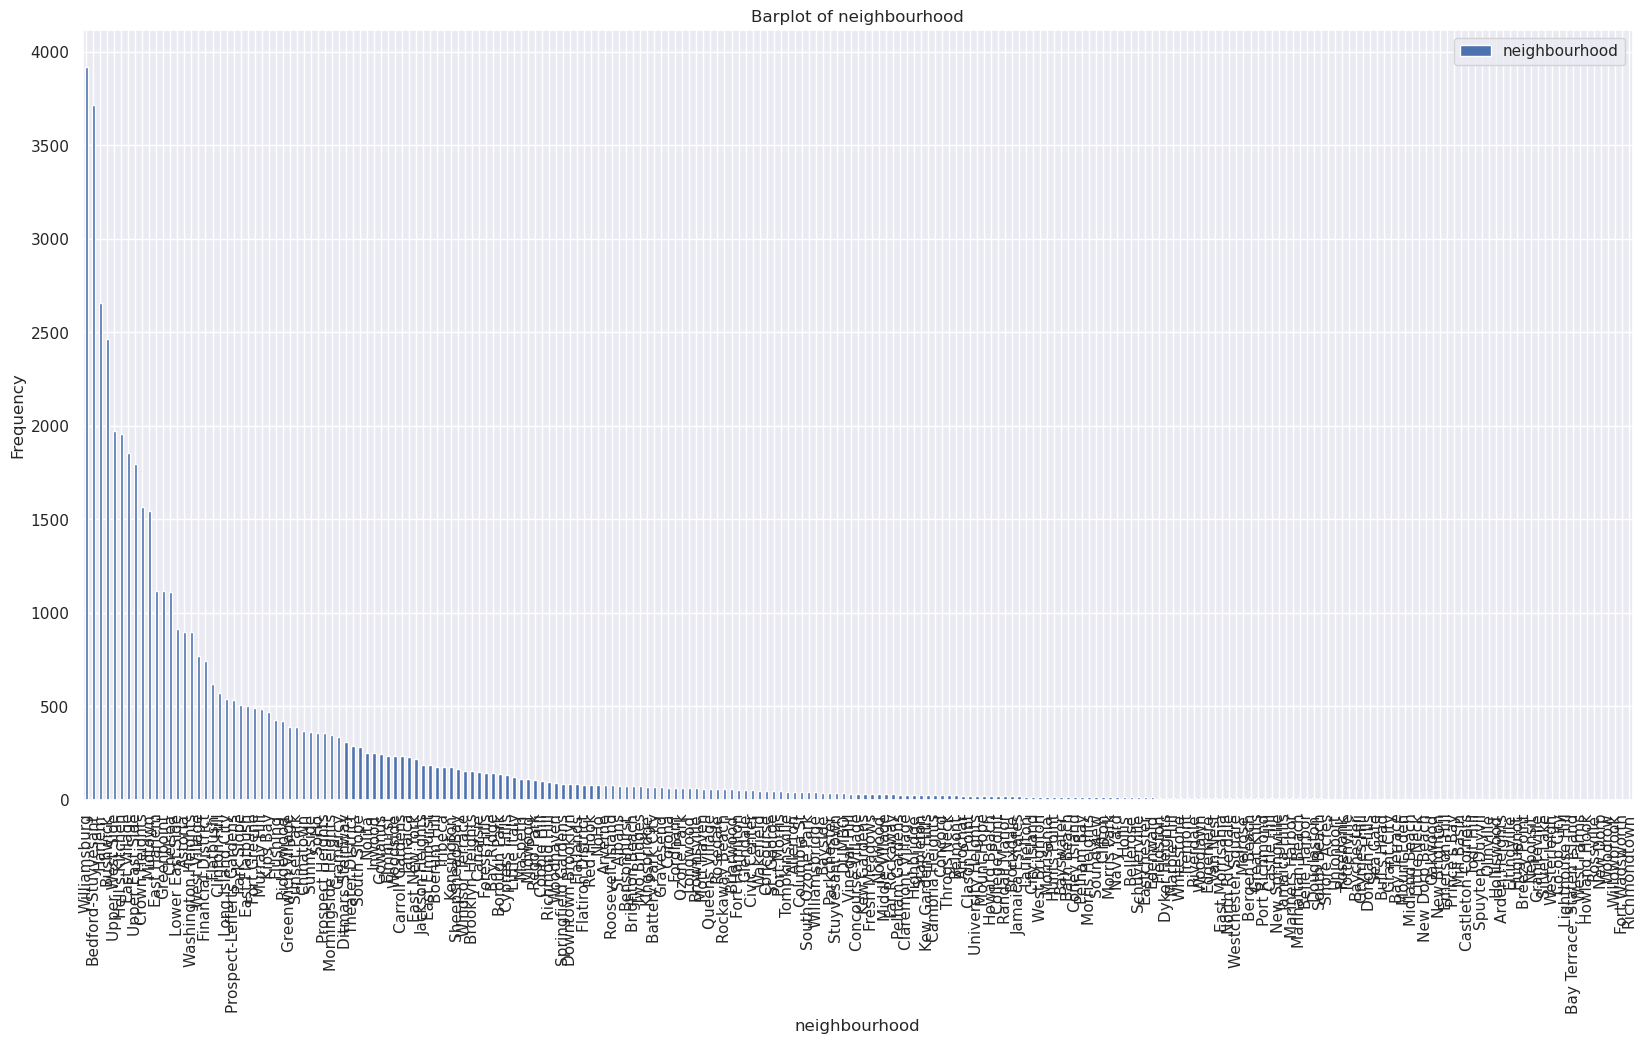

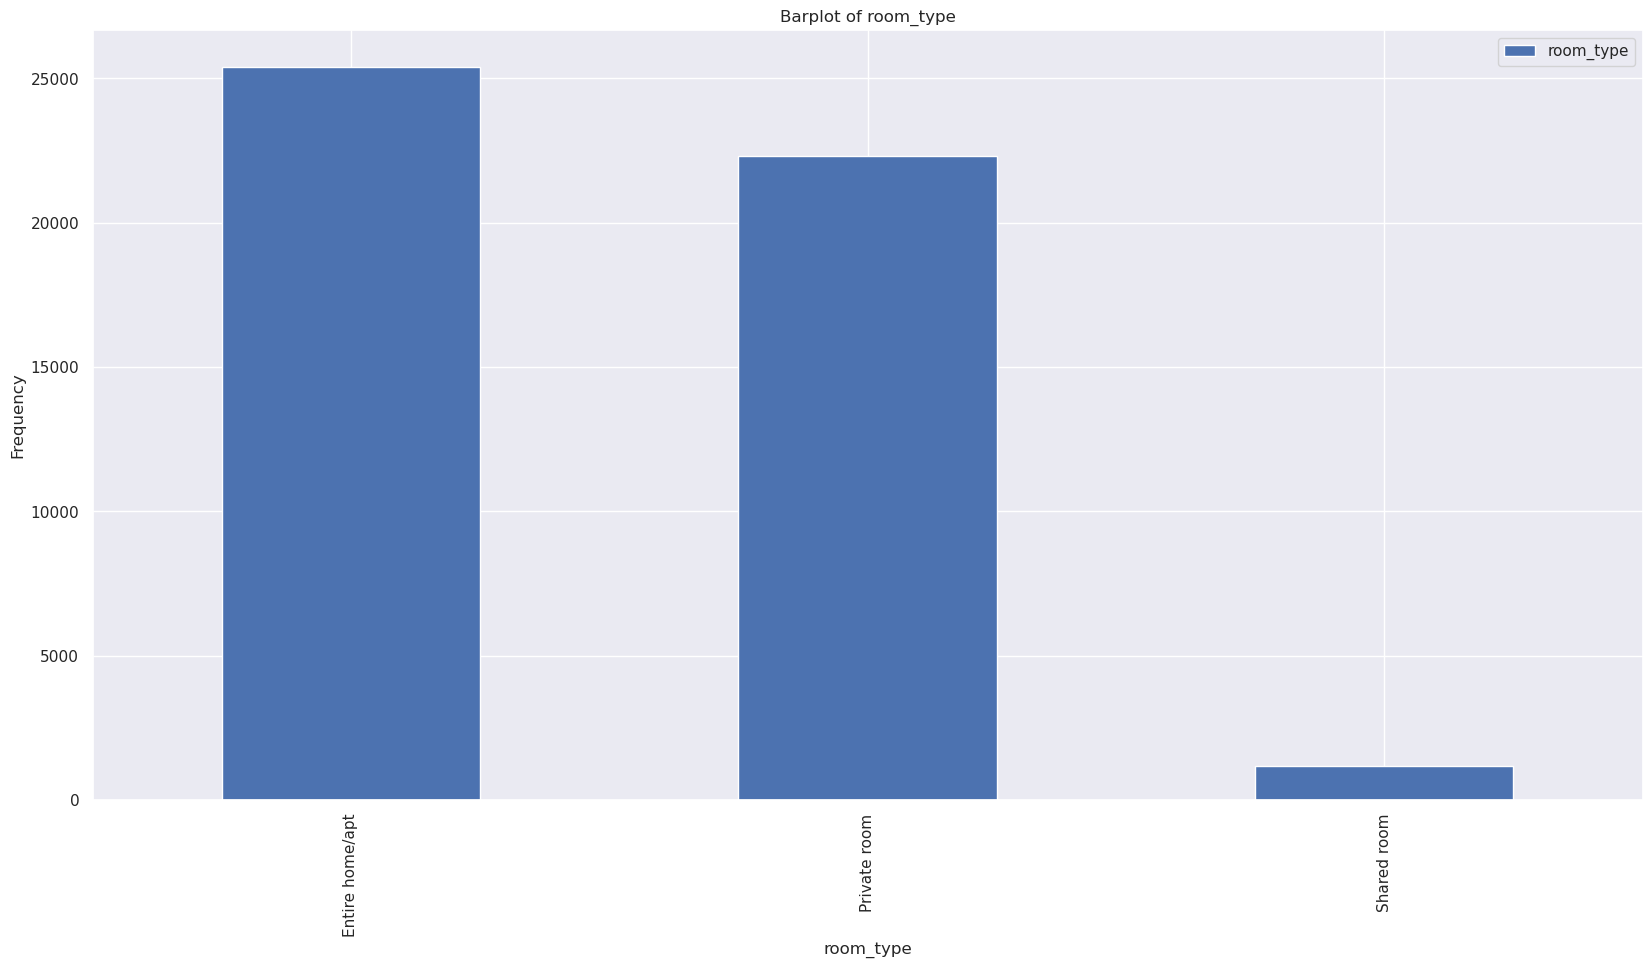

In [19]:
# get barplots for the categorical features
for col in cat_columns:
    plot = ed.plot_barplot(new_df, col)
    plot.show() 

Get Profile Report

In [22]:
# get the profile report for the original dataframe
profile = ProfileReport(df, title="Profiling Report")

Summarize dataset:  96%|████████████████████████████████████████████████████████████████████████   | 121/126 [00:25<00:01,  3.61it/s, Missing diagram heatmap]/home/mnahsan21/miniconda3/envs/mlflow-98454b373dd5cd544df7b8e59ec177a147888d9b/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/mnahsan21/miniconda3/envs/mlflow-98454b373dd5cd544df7b8e59ec177a147888d9b/lib/python3.9/site-packages/ydata_profiling/model/missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to fl

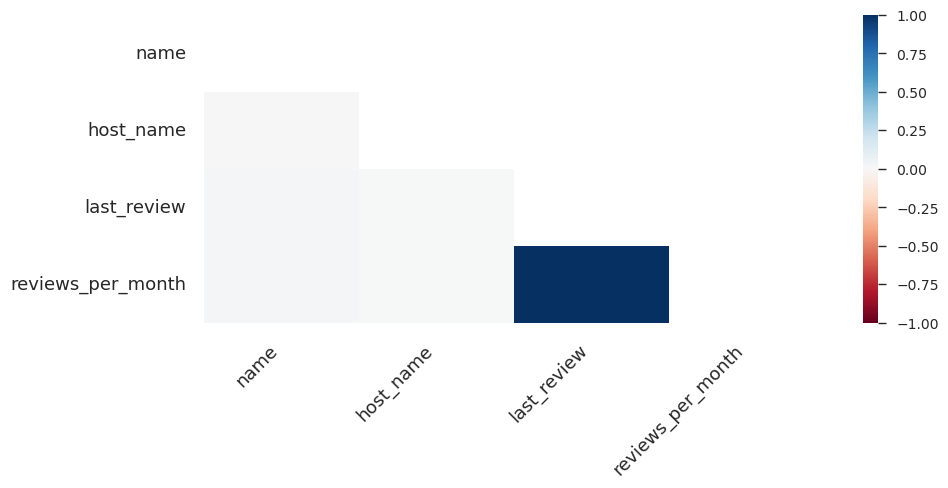

In [23]:
# export the report to HTML format
profile.to_file("Profiling Report.html")

In [24]:
# Drop price outliers and adjust the prices based on the business requirments
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

Final Check

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46428 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              46428 non-null  int64         
 1   name                            46413 non-null  object        
 2   host_id                         46428 non-null  int64         
 3   host_name                       46407 non-null  object        
 4   neighbourhood_group             46428 non-null  object        
 5   neighbourhood                   46428 non-null  object        
 6   latitude                        46428 non-null  float64       
 7   longitude                       46428 non-null  float64       
 8   room_type                       46428 non-null  object        
 9   price                           46428 non-null  int64         
 10  minimum_nights                  46428 non-null  int64         
 11  nu

In [26]:
# get a new profile report 
new_profile = ProfileReport(df, title="Profiling Report")

In [27]:
# export the report to HTML format
profile.to_file("Updated_Profiling Report.html")

Export report to file: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.86it/s]


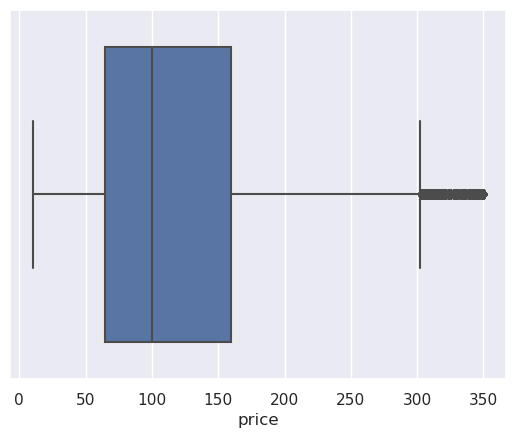

In [29]:
# get the updated boxplot of price
sns.boxplot(x=df['price']);

In [30]:
run.finish()